<ipython-input-5-43b959ad43da>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Recovered'].fillna(0, inplace=True)


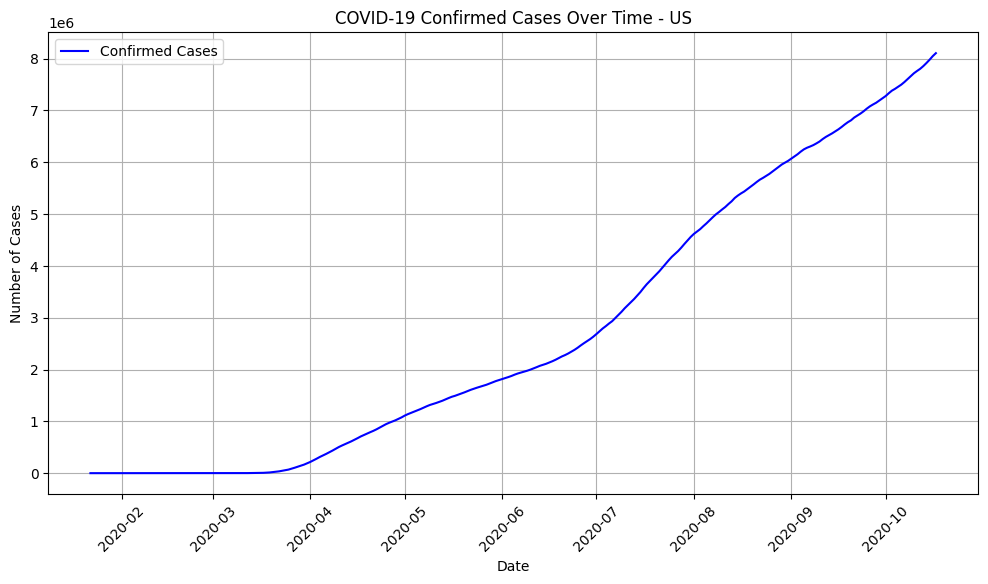

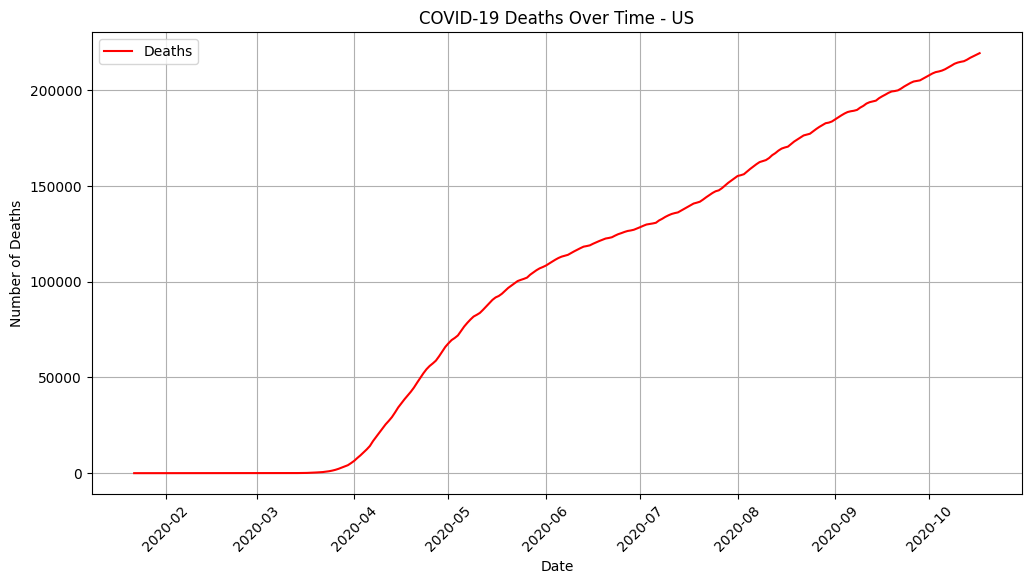

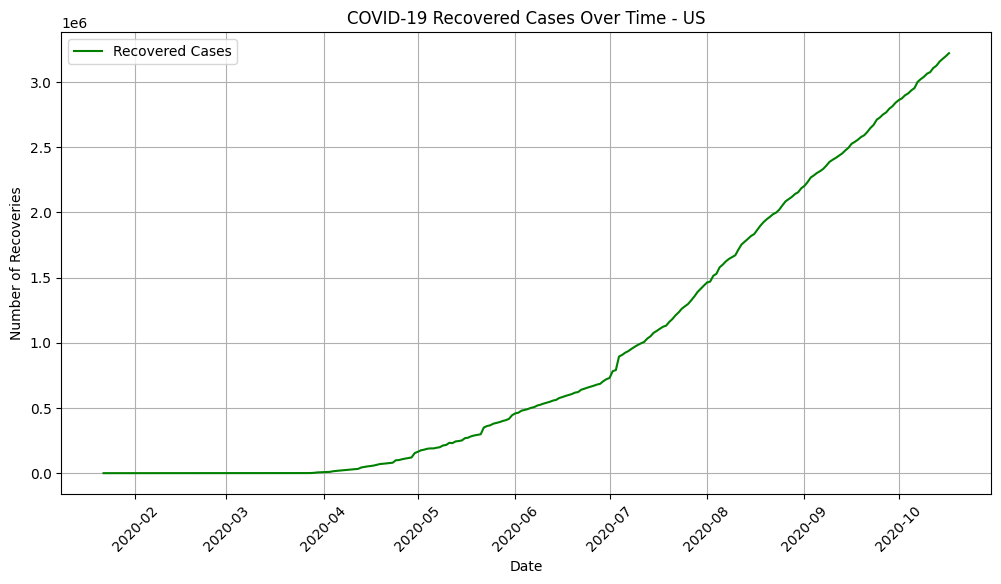

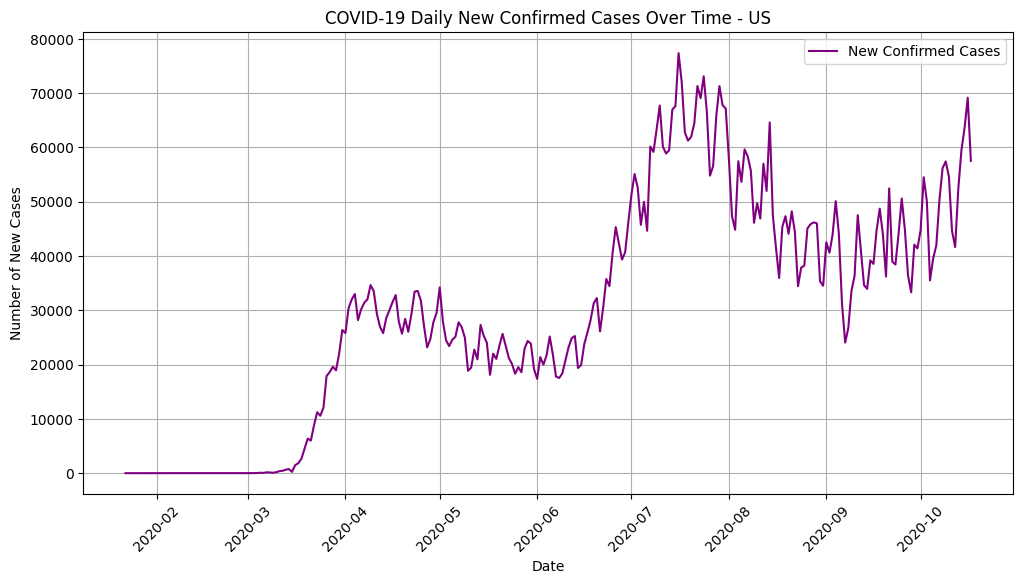

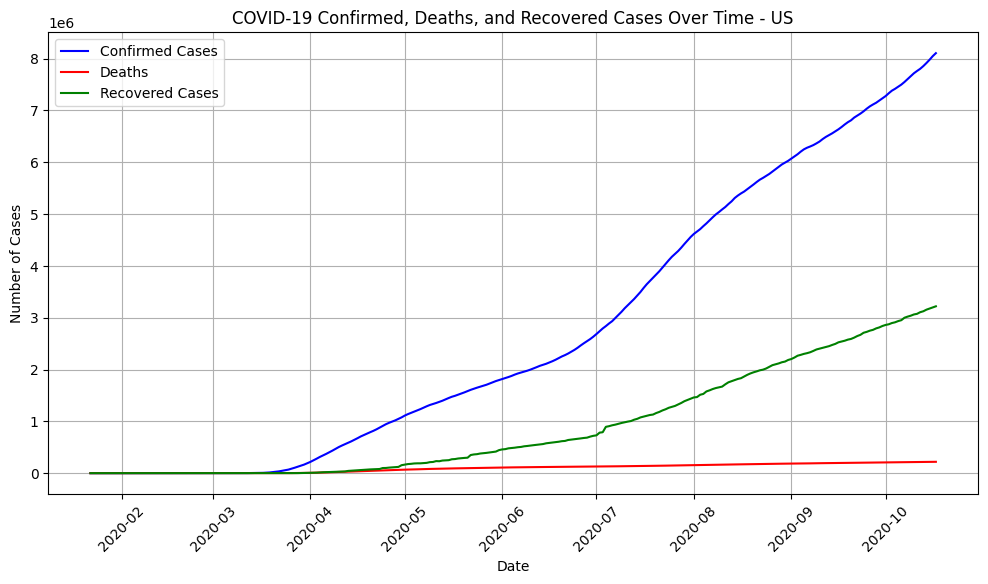

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/time-series-19-covid-combined.csv"  # Update with your file path if needed
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Fill missing values in 'Recovered' with 0
data['Recovered'].fillna(0, inplace=True)

# Filter for the US data
country_data = data[data['Country/Region'] == 'US']

# Aggregate data by date (some countries have province/state-level data)
country_data = country_data.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# Calculate daily new confirmed cases
country_data['New Confirmed'] = country_data['Confirmed'].diff().fillna(0)

# Plot Confirmed Cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=country_data, label='Confirmed Cases', color='blue')
plt.title('COVID-19 Confirmed Cases Over Time - US')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Deaths', data=country_data, label='Deaths', color='red')
plt.title('COVID-19 Deaths Over Time - US')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot Recovered Cases over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Recovered', data=country_data, label='Recovered Cases', color='green')
plt.title('COVID-19 Recovered Cases Over Time - US')
plt.xlabel('Date')
plt.ylabel('Number of Recoveries')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot daily new confirmed cases
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='New Confirmed', data=country_data, label='New Confirmed Cases', color='purple')
plt.title('COVID-19 Daily New Confirmed Cases Over Time - US')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot all three metrics together
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=country_data, label='Confirmed Cases', color='blue')
sns.lineplot(x='Date', y='Deaths', data=country_data, label='Deaths', color='red')
sns.lineplot(x='Date', y='Recovered', data=country_data, label='Recovered Cases', color='green')
plt.title('COVID-19 Confirmed, Deaths, and Recovered Cases Over Time - US')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
